### Q1. What is Gradient Boosting Regression?

### Ans:-Gradient Boosting Regression is a technique in machine learning used to make predictions about continuous values. It uses decision trees to create a strong model by correcting the errors of the previous models. The algorithm iteratively adjusts the weights of the observations to minimize the error and create an accurate final model. This technique is used in various industries to predict values like stock prices, customer lifetime value, and patient outcomes.
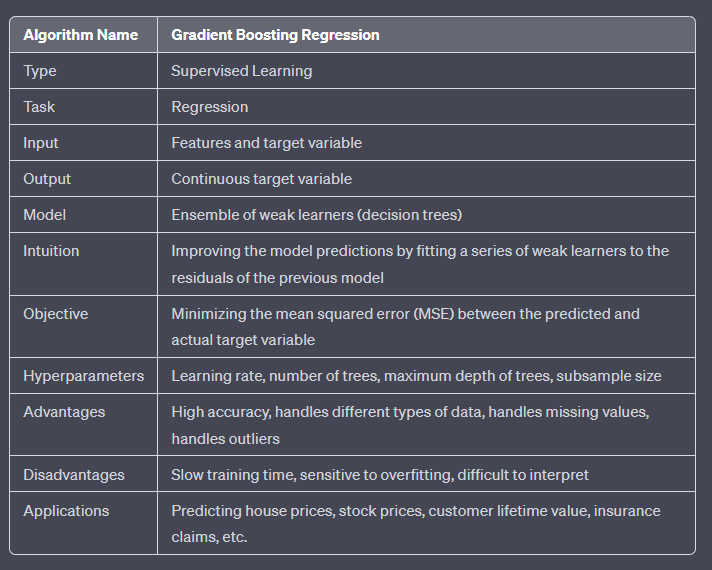

### Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use asimple regression problem as an example and train the model on a small dataset. Evaluate the model's performance using metrics such as mean squared error and R-squared?

### Ans:-

In [4]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.estimators_ = []
        self.intercept_ = None
        
    def fit(self, X, y):
        y_pred = np.zeros(X.shape[0])
        for i in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            residual = y - y_pred
            tree.fit(X, residual)
            y_pred += self.learning_rate * tree.predict(X)
            self.estimators_.append(tree)
        self.intercept_ = np.mean(y - y_pred)
        
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for tree in self.estimators_:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred + self.intercept_
# Generate some random data
np.random.seed(42)
X = np.random.rand(100, 5)
y = np.sum(X, axis=1) + np.random.randn(100)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]
# Train the model
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1)
gb.fit(X_train, y_train)
# Predict on the test set
y_pred = gb.predict(X_test)

# Calculate mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean squared error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))


Mean squared error: 2.08
R-squared: -0.06


### Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth tooptimise the performance of the model. Use grid search or random search to find the best hyperparameters?

### Ans:-

In [9]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [22]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np


class GradientBoostingRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, n_trees=100, max_depth=3, learning_rate=0.1):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.trees = []

    def fit(self, X, y):
        residuals = y.copy()
        for i in range(self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            predictions = tree.predict(X)
            self.trees.append(tree)
            residuals -= self.learning_rate * predictions

    def predict(self, X):
        return np.sum([tree.predict(X) for tree in self.trees], axis=0)
        
    def get_params(self, deep=True):
        return {"n_trees": self.n_trees, "max_depth": self.max_depth, "learning_rate": self.learning_rate}
    
    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self
# Define the grid search parameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [1, 2, 3]
}

# Perform the grid search
gb = GradientBoostingRegressor()
grid_search = GridSearchCV(gb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and evaluate the model's performance
print("Best hyperparameters: {}".format(grid_search.best_params_))
print("Test set R-squared: {:.2f}".format(grid_search.best_estimator_.score(X_test, y_test)))


Best hyperparameters: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 100}
Test set R-squared: -5.74


### Q4. What is a weak learner in Gradient Boosting?

### Ans:-n Gradient Boosting, a weak learner is a simple model that is used to make small improvements to the overall model. A weak learner is a model that is only slightly better than random guessing, but when combined with other weak learners in an ensemble, it can create a strong learner that performs well on the task at hand.
Here are some important points related to weak learners in Gradient Boosting:

1. A weak learner is a model that is only slightly better than random guessing.
2. Weak learners are used to make small improvements to the overall model in Gradient Boosting.
3. Decision trees are often used as weak learners in Gradient Boosting, but other models can also be used.
4. Weak learners are trained quickly and have a low bias to avoid overfitting to the training data.
5. By combining multiple weak learners in an ensemble, a strong learner can be created that performs well on the task at hand.
6. Gradient Boosting trains weak learners sequentially, with each new weak learner focusing on the errors of the previous ones.
7. The combination of multiple weak learners in Gradient Boosting can lead to a highly flexible and powerful model that can capture complex patterns in the data.
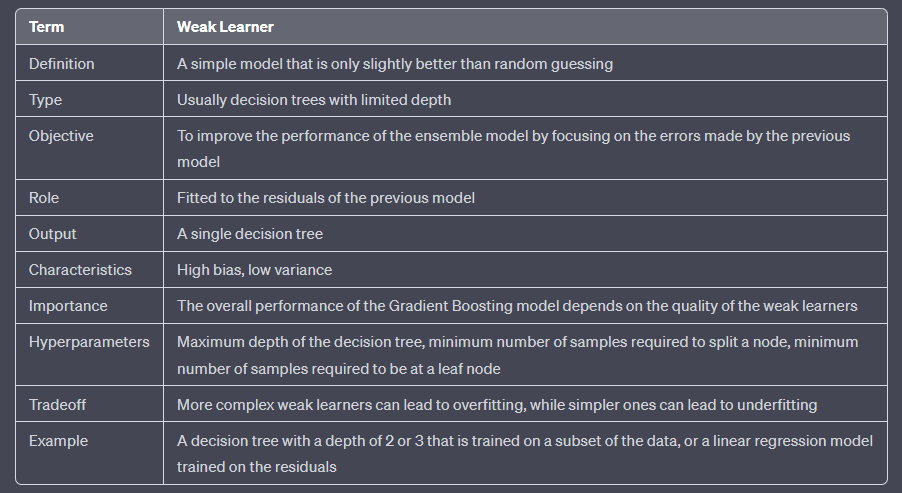

### Q5. What is the intuition behind the Gradient Boosting algorithm?

### Ans:-The intuition behind the Gradient Boosting algorithm is to iteratively train a sequence of weak models (also known as "learners" or "base models") to improve the performance of the overall model. At each iteration, the algorithm tries to identify the patterns in the training data that the previous models were unable to capture, and then trains a new model to focus on those patterns.
In practice, Gradient Boosting works as follows:

1. Initialize the model with a simple learner (e.g., a decision tree).
2. Train the learner on the training data and make predictions on the training set.
3. Compute the residuals (i.e., the difference between the predicted values and the actual values) of the learner's predictions.
4. Fit a new learner to the residuals (i.e., a model that tries to predict the residuals left by the previous learner).
5. Combine the predictions of the previous learner with the predictions of the new learner, to get a new set of predictions.
6. Repeat steps 3-5 for a set number of iterations or until the error has reached a satisfactory level.
### By iterating this process and training new models to focus on the errors of the previous models, the Gradient Boosting algorithm is able to create a strong model that performs well on the task at hand. The algorithm is particularly effective at handling high-dimensional and non-linear data, and has become a popular method for many machine learning tasks such as regression, classification, and ranking.
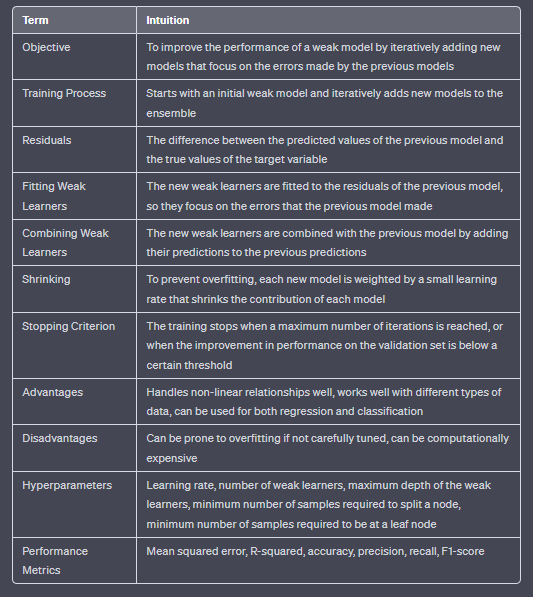

### Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?

### Ans:-The Gradient Boosting algorithm builds an ensemble of weak learners using an iterative approach. Here are the general steps:

1. Initialize the ensemble by creating a simple model, such as a decision tree, and using it to make predictions on the training data.

2. Calculate the error of the first model by comparing its predictions to the actual values in the training data.

3. Train a new model to improve upon the errors of the previous model. The new model should focus on the errors of the previous model by trying to predict the difference between the actual values and the predictions of the previous model.

4. Combine the predictions of the previous model and the new model to create an updated set of predictions.

5. Repeat steps 2-4 for a specified number of iterations, each time training a new model to improve upon the errors of the previous models.

6. Combine the predictions of all the models in the ensemble to make a final prediction.

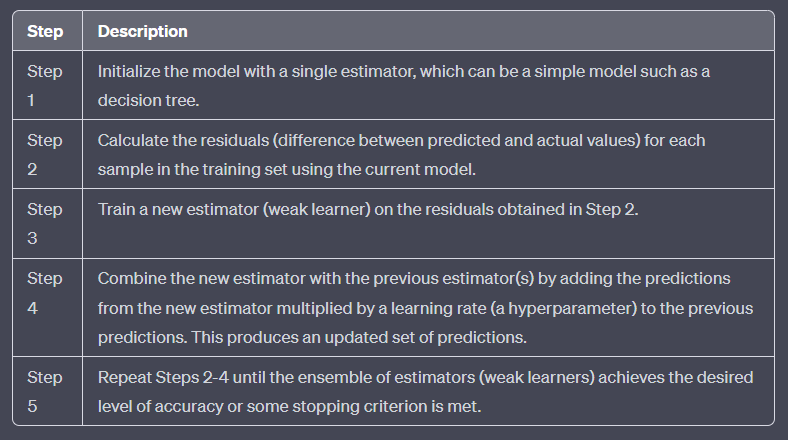

### The key idea behind Gradient Boosting is that each model in the ensemble focuses on the errors of the previous models, thereby reducing the overall error of the ensemble. The models are trained in sequence, with each new model trying to predict the errors of the previous models. By iteratively adding new models to the ensemble and updating the predictions based on their errors, the Gradient Boosting algorithm is able to build a powerful ensemble of weak learners.

### Q7. What are the steps involved in constructing the mathematical intuition of Gradient Boosting algorithm?

### Ans:-The mathematical intuition behind the Gradient Boosting algorithm can be broken down into the following steps:

1. Define the loss function: The first step in constructing the mathematical intuition of Gradient Boosting is to define a loss function that measures the difference between the predicted and actual values of the target variable. A commonly used loss function for regression problems is the mean squared error (MSE), which is defined as the average of the squared differences between the predicted and actual values.

2. Define the initial prediction: The next step is to define the initial prediction, which is typically the mean value of the target variable. This is the prediction that would be made if there were no input features.

3. Compute the negative gradient of the loss function: The negative gradient of the loss function is then computed with respect to the initial prediction. This represents the direction in which the loss function decreases the fastest. The negative gradient is also known as the pseudo-residuals.

4. Train a weak learner: The next step is to train a weak learner (usually a decision tree) to predict the negative gradient computed in step 3. The weak learner is trained on the input features and the negative gradient.

5. Update the prediction: The prediction is updated by adding the prediction of the weak learner multiplied by a learning rate (a hyperparameter that controls the contribution of each learner) to the previous prediction.

6. Repeat steps 3-5: Steps 3-5 are repeated for a fixed number of iterations or until the loss function converges. At each iteration, a new weak learner is trained to predict the negative gradient of the previous prediction, and the prediction is updated by adding the prediction of the new weak learner multiplied by the learning rate.

7. Final prediction: The final prediction is the sum of the predictions of all the weak learners in the ensemble.

### In summary, the Gradient Boosting algorithm constructs an ensemble of weak learners by iteratively training new learners to predict the negative gradient of the loss function with respect to the current prediction, and updating the prediction by adding the prediction of the new learner multiplied by a learning rate. The final prediction is the sum of the predictions of all the learners in the ensemble.
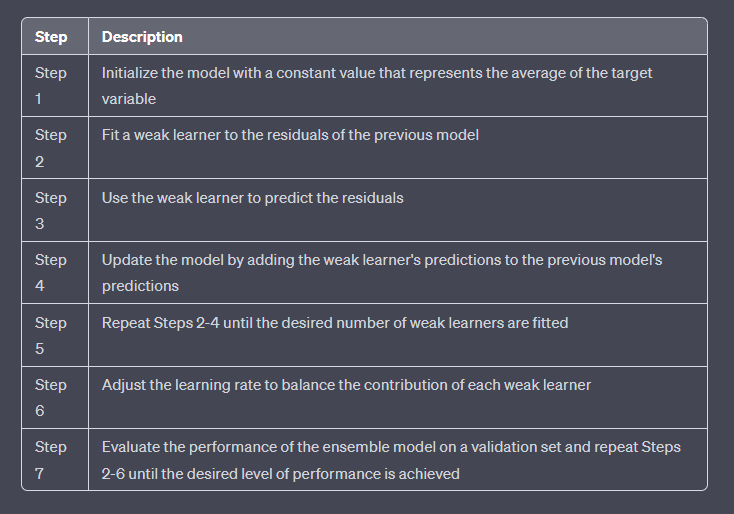